# Uploading the Dataset

In [1]:
!pip install seaborn

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential 
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.utils import np_utils

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Import the csv file

face_data = pd.read_csv('Data/fer2013.csv')
face_data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


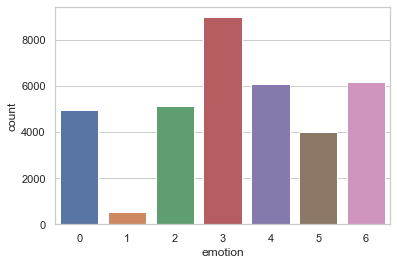

In [4]:
X = face_data['pixels']
Y = face_data['emotion']
sns.set_theme(style = "whitegrid")
ax = sns.countplot(x='emotion', data = face_data)

C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.
C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.
C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists

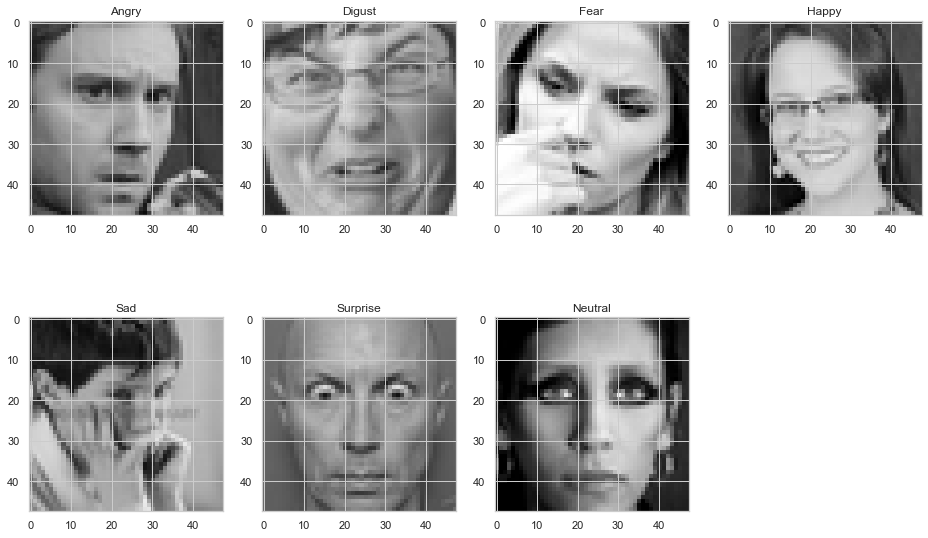

In [5]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
def row2image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split())
    img = img.reshape(48,48)
    image = np.zeros((48,48,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return np.array([image.astype(np.uint8), emotion])

plt.figure(0, figsize=(16,10))
for i in range(1,8):
    face = face_data[face_data['emotion'] == i-1].iloc[0]
    img = row2image(face)
    plt.subplot(2,4,i)
    plt.imshow(img[0])
    plt.title(img[1])

plt.show()  

# Emotions columns 
0  anger
1 - disgust
2 - fear
3 - happiness
4 - sad
5 - surprise 
6 - neutral

In [6]:
#create empty arrays to store the data for the training and testing
#X are pixels
#y are labels 
X_train = []
y_train = []
X_test = []
y_test = []


#iterate the data and split it into the arrays 
#all the index of the data into first row (index) and content of the whole row into row
for index, row in face_data.iterrows():
    k = row['pixels'].split(' ')
    if row['Usage'] == 'Training':
        #add to training arrays
        X_train.append(np.array(k,'float64'))
        y_train.append(row['emotion'])
        
    elif row ['Usage'] == 'Public Test':
        #add to testing arrays
        X_test.append(np.array(k,'float64'))
        y_test.append(row['emotion'])

# Shape the arrays 

In [7]:


#convert the arrays into numpy 
X_train = np.array(X_train, "float64")
y_train = np.array(y_train,"float64")

X_test = np.array(X_test,"float64")
y_test = np.array(y_train,"float64")



In [8]:
#reshape (pixels 48 x 48 and 1 for greyscale)
X_train = X_train.reshape(X_train.shape[0],48,48,1)
X_test = X_test.reshape(X_test.shape[0],48,48,1)

In [9]:
X_train

array([[[[ 70.],
         [ 80.],
         [ 82.],
         ...,
         [ 52.],
         [ 43.],
         [ 41.]],

        [[ 65.],
         [ 61.],
         [ 58.],
         ...,
         [ 56.],
         [ 52.],
         [ 44.]],

        [[ 50.],
         [ 43.],
         [ 54.],
         ...,
         [ 49.],
         [ 56.],
         [ 47.]],

        ...,

        [[ 91.],
         [ 65.],
         [ 42.],
         ...,
         [ 72.],
         [ 56.],
         [ 43.]],

        [[ 77.],
         [ 82.],
         [ 79.],
         ...,
         [105.],
         [ 70.],
         [ 46.]],

        [[ 77.],
         [ 72.],
         [ 84.],
         ...,
         [106.],
         [109.],
         [ 82.]]],


       [[[151.],
         [150.],
         [147.],
         ...,
         [129.],
         [140.],
         [120.]],

        [[151.],
         [149.],
         [149.],
         ...,
         [122.],
         [141.],
         [137.]],

        [[151.],
         [151.],
      

In [10]:
X_test

array([], shape=(0, 48, 48, 1), dtype=float64)

In [11]:
y_train=np_utils.to_categorical(y_train,num_classes = 7)
y_test=np_utils.to_categorical(y_test,num_classes = 7)

In [12]:
y_train


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [13]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# Convolutional Neural Network (CNN)

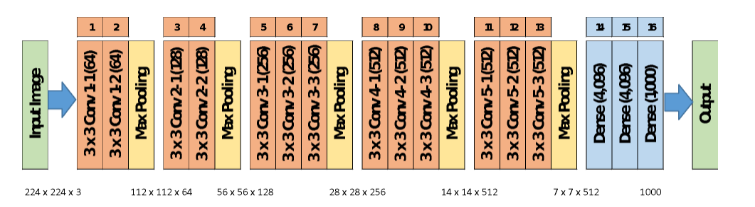

In [14]:
#Use sequential model becuase data will be moved from one layer to another
model = Sequential()

#Layer 1
model.add(Conv2D(input_shape=(X_train.shape[1:]),filters = 64,kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3), padding = "same", activation = "relu"))  
model.add(MaxPool2D(pool_size = (2,2),strides=(2,2)))             

#Layer 2    
model.add(Conv2D(filters = 128,kernel_size = (3,3), padding = "same", activation = "relu"))  
model.add(Conv2D(filters = 128,kernel_size = (3,3), padding = "same", activation = "relu"))   
model.add(MaxPool2D(pool_size = (2,2),strides=(2,2)))        

#Layer 3 
model.add(Conv2D(filters = 256,kernel_size = (3,3), padding = "same", activation = "relu")) 
model.add(Conv2D(filters = 256,kernel_size = (3,3), padding = "same", activation = "relu"))   
model.add(Conv2D(filters = 256,kernel_size = (3,3), padding = "same", activation = "relu"))       
model.add(MaxPool2D(pool_size = (2,2),strides=(2,2)))      

#Layer 4
model.add(Conv2D(filters = 512,kernel_size = (3,3), padding = "same", activation = "relu"))   
model.add(Conv2D(filters = 512,kernel_size = (3,3), padding = "same", activation = "relu"))   
model.add(Conv2D(filters = 512,kernel_size = (3,3), padding = "same", activation = "relu"))       
model.add(MaxPool2D(pool_size = (2,2),strides=(2,2)))     

#connected layers

#Flatten layer function that converts all the pooled features into a map of a single column
model.add(Flatten())
#Dense layer 
model.add(Dense(4096,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation = 'softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       2

# Training the model

In [15]:
#Compile the model
model.compile(optimizer  = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size = 32 , epochs = 30, verbose = 1, validation_data = (X_test,y_test), shuffle = True)

Epoch 1/30
590/898 [==================>...........] - ETA: 5:07 - loss: 1.7888 - accuracy: 0.2688

In [ ]:
#Saving the  model to  use it later on  
cnn_json = model.to_json()  
with open("cnn_json.json", "w") as json_file:  
    json_file.write(cnn_json)  
model.save_weights("cnn_json.h5") 